# Setting Up

In [ ]:
!nvidia-smi

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [ ]:
# import torch
# from transformers import AutoModelForSequenceClassification, AutoConfig
# from fastai.text.all import *
# from blurr.text.data.all import *
# from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
%cd /content/drive/MyDrive/Colab Notebooks/dokkho NLP test

/content/drive/MyDrive/Colab Notebooks/dokkho NLP test


# Data

In [ ]:
import pandas as pd
df = pd.read_csv("book_details.csv")
df.head()

# data processing:

My initial test

In [ ]:
# import pandas as pd
# df = pd.read_csv("book_details.csv")

#my test
import pandas as pd
qdf = pd.read_csv('quote-nlp-dataset.csv', encoding='utf-8', engine='python')#, on_bad_lines='skip', sep='delimiter')
#qdf = qdf[["attirbuted author", "quote", "quote_info_list", "quote_info_list_w_author"]] #cheatsheet
print(qdf.shape)
#qdf.head()
qdf.head()

(38560, 6)


attirbuted author  \
0      Albert Einstein   
1          Frank Zappa   
2             Mae West   
3  Narcotics Anonymous   
4          Jane Austen   

                                                                                                    quote  \
0         Two things are infinite: the universe and human stupidity; and I'm not sure about the universe.   
1                                                                          So many books, so little time.   
2                                             You only live once, but if you do it right, once is enough.   
3                 Insanity is doing the same thing, over and over again, but expecting different results.   
4  The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.   

                                                                                                                               quote_info_list  \
0           ['attributed-no-source', 'human-nature', 'humor', 'infinity', 'philosophy', 'science', 'stupidity', 'universe', 'Albert Einstein']   
1                                                                                                            ['books', 'humor', 'Frank Zappa']   
2                                                                                                                ['humor', 'life', 'Mae West']   
3  ['humor', 'insanity', 'life', 'misattributed-ben-franklin', 'misattributed-mark-twain', 'misattributed-to-einstein', 'Narcotics Anonymous']   
4                                                                                    ['aliteracy', 'books', 'classic', 'humor', 'Jane Austen']   

                                                                                                                      quote_info_list_w_author  \
0           ['attributed-no-source', 'human-nature', 'humor', 'infinity', 'philosophy', 'science', 'stupidity', 'universe', 'Albert Einstein']   
1                                                                                                            ['books', 'humor', 'Frank Zappa']   
2                                                                                                                ['humor', 'life', 'Mae West']   
3  ['humor', 'insanity', 'life', 'misattributed-ben-franklin', 'misattributed-mark-twain', 'misattributed-to-einstein', 'Narcotics Anonymous']   
4                                                                                    ['aliteracy', 'books', 'classic', 'humor', 'Jane Austen']   

                   revised_quote_info  \
0  ['humor', 'philosophy', 'science']   
1                  ['books', 'humor']   
2                   ['humor', 'life']   
3                   ['humor', 'life']   
4                  ['books', 'humor']   

                                                                                                                                                                                                                                                                                                            tag_cat_list  
0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
1  [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
2  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# get df how many nan rows
# .any with parameter axis=1. for check at least one True in row by DataFrame.isna with boolean indexing:
nan_df = qdf[qdf.isna().any(axis=1)]
#pd.set_option('display.max_rows', None)
#display(nan_df)

# drop even if a nan col in rows
print(qdf.shape)
qdf.dropna(inplace= True)
print('after dropping nan rows:', qdf.shape)
#display(qdf)

#no rows having nan values:
# nan_df = qdf[qdf.isna().any(axis=1)]
# display(nan_df)

#drop duplicates. keep only one occurence.
qdf.drop_duplicates(subset="quote", keep='first', inplace=True)
print('after dropping duplicate rows:', qdf.shape)

(39751, 4)
after dropping nan rows: (39751, 4)
after dropping duplicate rows: (39751, 4)


# Scrap error cleaning. cheatsheet it:

load data:

In [ ]:
qdf = pd.read_csv('quote_file.csv', encoding='utf-8', engine='python')
qdf.shape

(39741, 4)

find error:

In [ ]:
info_list = qdf.quote_info_list.to_list()

scrap_error_idx_list = []
for tag_list in info_list: #info_list is string. check if this string is python list or not

    try:
        #print(tag_list)
        tag_list = eval(tag_list)
        #print(type(tag_list), tag_list)
    except :
        idx = qdf[ qdf['quote_info_list'] == tag_list ].index.values.astype(int)[0] #qdf[ qdf['quote_info_list_w_author'] == info_list ].index
        #print(idx)
        #display(qdf.iloc[idx])
        scrap_error_idx_list.append(idx)
         #break #qdf.index[6102], qdf.index[6399], qdf.index[6987


print(len(scrap_error_idx_list))
#must descend order before delete
scrap_error_idx_list.sort(reverse=True) #must so that you drop from under keeping serial intact
print(scrap_error_idx_list)

0
[]


view:

In [ ]:
scrap_error_idx_list=[20775, dfsfs,fsdfsdf,fsdfsdf,sdfsdfsdf]
qdf.loc[scrap_error_idx_list]

In [ ]:
# view df rows using index:
#view as dtype obj:
#print(qdf.iloc[6102], qdf.iloc[6399], qdf.iloc[6987])  #498], 502], 503]) 6101, 6401 6989 7442
#qdf.loc[18286]
#view as df
# new_df = df.loc[[1, 3, 5]]
# new_df = df1.append(df2.loc[x], ignore_index=True)

for idx in scrap_error_idx_list:
    print(qdf.iloc[idx],'\n')
#print(qdf.iloc[7442], qdf.iloc[6399], qdf.iloc[6987])

drop:

In [ ]:
#print(scrap_error_idx_list)

print(qdf.shape)
#drop on index
for idx in scrap_error_idx_list:
    #try:
        print(idx)
        qdf.drop( [qdf.index[idx]], inplace=True,)
    #except:
        #print(qdf.iloc[idx],'\n')

print('after:', qdf.shape)


(39742, 4)
20775
after: (39741, 4)


save:

In [ ]:
print(qdf.shape)
qdf.to_csv('test_file.csv',encoding='utf-8-sig', index=False) #encoding='utf-8-sig' should work. also encoding='utf-16' but not alawys works

(38560, 5)


In [ ]:
qdf = pd.read_csv('test_file.csv', encoding='utf-8', engine='python')
print(qdf.shape)
qdf.tail(100)

In [ ]:
read quote. replace \n and \r with ''

# Scrap error Cleaned

In [ ]:
info_list = qdf.quote_info_list.to_list()
info_list

tag_count = {}

for tag_list in info_list: # type(info_list) is string
    tag_list = eval(tag_list)
    print(tag_list)
    for tag in tag_list:
        if tag in tag_count.keys():
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
print(f"Number of tags: {len(tag_count)}")
print(tag_count)        # irbz vai Number of Genres: 640 for 6k. for my 39751 keep 4000


view count. sorted:

In [ ]:
# #view sorted count
# import numpy as np
# keys = list(tag_count.keys())
# values = list(tag_count.values())
# sorted_value_index = np.argsort(values)
# sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

# #print(sorted_dict)
# for k,v in sorted_dict.items():
#     print(k,v)

In [ ]:
# threshold = int(len(qdf) * 0.01)
# print(threshold)

# print(len(tag_count))
# values = list(tag_count.values())
# threshold = int(max(values) * 0.01)
# print(threshold)

# #txt line 35837 my 1st choice. value=244
# #num of tags: 35839


397
1987
35936
83


must build tag_count first

In [ ]:
# #threshold = 244 #if you want 141 catgory, value=190
# #threshold = int(len(qdf) * 0.01)  #gives 103 output catg
# # value =84 is highest acceptable. self-confidence. gives 372 catgr
# threshold = 244 #x value
# rare_genres = [key for key, value in tag_count.items() if value < threshold]
# len(tag_count), len(rare_genres), rare_genres[:5]
# # rare_genres = [key for key, value in genre_count.items() if value < threshold]
# # len(genre_count), len(rare_genres), rare_genres[:5]

drop attributed, misattributed, no-source
remove christian , donkey and hitchshit, harari, sam harris,
gay, glbt, lesbian, lgbt, queer,

In [ ]:
#takes 4min
info_list = qdf.quote_info_list.to_list()
revised_tag_list = []
indices_to_drop = []

revised_tagset = set() #just to count uniqe tags
for idx, tag_list in enumerate(info_list):
  tag_list = eval(tag_list)
  revised_tags = []

  for tag in tag_list:
    if tag not in rare_genres:
      revised_tags.append(tag)
      revised_tagset.add(tag)

  if len(revised_tags) == 0:
    indices_to_drop.append(idx)
  else:
    revised_tag_list.append(revised_tags)

qdf = qdf.drop(indices_to_drop).reset_index(drop=True)
qdf.shape

(38560, 4)

In [ ]:
len(revised_tagset)

103

In [ ]:
qdf['revised_quote_info'] = revised_tag_list
#qdf.drop(columns=['Resume_html', 'ID'], inplace = True)

In [ ]:
qdf.tail()

In [ ]:
info_list = qdf.revised_quote_info.to_list()
info_list

revised_tag_count = {}

for tag_list in info_list: # type(info_list) is string. tag_list in info_list is string
    #print(tag_list)
    tag_list = eval(tag_list) #string type cannot be made to_list() | eval() will make string to py expression.
    for tag in tag_list:
        if tag in revised_tag_count.keys():
            revised_tag_count[tag] += 1
        else:
            revised_tag_count[tag] = 1
print(f"Number of tags: {len(revised_tag_count)}")
print(revised_tag_count)        # irbz vai Number of Genres: 640 for 6k. for my 39751 keep 4000


Number of tags: 103
{'humor': 3858, 'philosophy': 1459, 'science': 3027, 'books': 350, 'life': 8309, 'work': 329, 'writing': 353, 'religion': 964, 'women': 263, 'death': 3171, 'fear': 395, 'reading': 270, 'lies': 244, 'truth': 3598, 'people': 330, 'love': 4962, 'inspirational': 4845, 'Cassandra Clare': 304, 'god': 3202, 'funny': 341, 'humanity': 318, 'wisdom': 3544, 'success': 3075, 'knowledge': 598, 'happiness': 3327, 'faith': 779, 'time': 3009, 'friendship': 390, 'romance': 490, 'peace': 387, 'quotes': 946, 'beauty': 348, 'money': 396, 'poetry': 732, 'change': 450, 'relationships': 496, 'motivation': 1542, 'art': 374, 'dreams': 550, 'optimism': 395, 'christianity': 315, 'spirituality': 780, 'mind': 246, 'passion': 253, 'life-lessons': 3392, 'inspiration': 1405, 'education': 291, 'pain': 316, 'failure': 384, 'belief': 286, 'life-and-living': 386, 'reality': 357, 'action': 245, 'future': 344, 'nature': 399, 'living': 609, 'positive': 363, 'inspirational-life': 392, 'inspirational-quote

In [ ]:
# print(qdf.shape)
# qdf.to_csv('test_file.csv',encoding='utf-8-sig', index=False) #encoding='utf-8-sig' should work. also encoding='utf-16' but not alawys works
# qdf.tail()

encode:

In [ ]:
import json
encode_tag_types = { key: idx for idx, (key, value) in enumerate(revised_tag_count.items())}
with open("tag_types_encoded.json", "w") as fp:
  json.dump(encode_tag_types, fp)

In [ ]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_tag_list = []
revised_quote_info = qdf.revised_quote_info.to_list()
#type(df.revised_genres.to_list()), tpye(df.revised_genres)

for tag_list in revised_quote_info:
  categorical_list = [0] * len(encode_tag_types)
  tag_list = eval(tag_list)
  for tag in tag_list:
    #print(tag)
    tag_type_index = encode_tag_types[tag]
    categorical_list[tag_type_index] = 1
  categorical_tag_list.append(categorical_list)

categorical_tag_list[3][:23]

[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
qdf['tag_cat_list'] = categorical_tag_list
qdf.head()

attirbuted author  \
0      Albert Einstein   
1          Frank Zappa   
2             Mae West   
3  Narcotics Anonymous   
4          Jane Austen   

                                                                                                    quote  \
0         Two things are infinite: the universe and human stupidity; and I'm not sure about the universe.   
1                                                                          So many books, so little time.   
2                                             You only live once, but if you do it right, once is enough.   
3                 Insanity is doing the same thing, over and over again, but expecting different results.   
4  The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.   

                                                                                                                               quote_info_list  \
0           ['attributed-no-source', 'human-nature', 'humor', 'infinity', 'philosophy', 'science', 'stupidity', 'universe', 'Albert Einstein']   
1                                                                                                            ['books', 'humor', 'Frank Zappa']   
2                                                                                                                ['humor', 'life', 'Mae West']   
3  ['humor', 'insanity', 'life', 'misattributed-ben-franklin', 'misattributed-mark-twain', 'misattributed-to-einstein', 'Narcotics Anonymous']   
4                                                                                    ['aliteracy', 'books', 'classic', 'humor', 'Jane Austen']   

                                                                                                                      quote_info_list_w_author  \
0           ['attributed-no-source', 'human-nature', 'humor', 'infinity', 'philosophy', 'science', 'stupidity', 'universe', 'Albert Einstein']   
1                                                                                                            ['books', 'humor', 'Frank Zappa']   
2                                                                                                                ['humor', 'life', 'Mae West']   
3  ['humor', 'insanity', 'life', 'misattributed-ben-franklin', 'misattributed-mark-twain', 'misattributed-to-einstein', 'Narcotics Anonymous']   
4                                                                                    ['aliteracy', 'books', 'classic', 'humor', 'Jane Austen']   

                   revised_quote_info  \
0  ['humor', 'philosophy', 'science']   
1                  ['books', 'humor']   
2                   ['humor', 'life']   
3                   ['humor', 'life']   
4                  ['books', 'humor']   

                                                                                                                                                                                                                                                                                                        tag_cat_list  
0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]  
1  [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]  
2  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# checkpoint

In [ ]:
# print(qdf.shape)
# qdf.to_csv('test_file.csv',encoding='utf-8-sig', index=False) #encoding='utf-8-sig' should work. also encoding='utf-16' but not alawys works

(38560, 6)


In [ ]:
#save csv
#load csv

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/dokkho NLP test'

In [4]:
import pandas as pd
qdf = pd.read_csv('quote-nlp-dataset.csv', encoding='utf-8', engine='python')#, on_bad_lines='skip', sep='delimiter')

In [5]:
qdf['tag_cat_list'].apply(type) # <class 'str'>
def string_to_list( string):
  clean_data = string.strip('\'')
  clean_data_to_list = eval(clean_data)
  return clean_data_to_list

qdf['tag_cat_list'] = qdf['tag_cat_list'].apply(string_to_list)
qdf['tag_cat_list'].apply(type) # <class 'list'> containing integers

0        <class 'list'>
1        <class 'list'>
2        <class 'list'>
3        <class 'list'>
4        <class 'list'>
              ...      
38555    <class 'list'>
38556    <class 'list'>
38557    <class 'list'>
38558    <class 'list'>
38559    <class 'list'>
Name: tag_cat_list, Length: 38560, dtype: object

# Dataloaders and Modeling

In [6]:
with open('tag_types_encoded.json', 'r') as f:
  encode_data = json.load(f)
labels = list(encode_data.keys())   #(encode_tag_types.keys())

In [7]:
model_name = "roberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"
#hf_tokenizer = AutoTokenizer.from_pretrained("roberta-base")

In [8]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('quote'), get_y=ColReader('tag_cat_list'), splitter=RandomSplitter(valid_pct=0.2, seed=42)) #alid_pct=0.1

In [16]:
# dls = dblock.dataloaders(qdf, bs=32)
# torch.save(dls, "dataloaders/dls-multilabel-quote-classifier-2.pkl")
# #time benchmark:

In [9]:
dls = torch.load("dataloaders/dls-multilabel-quote-classifier-2.pkl")

In [18]:
# dls.vocab

['humor', 'philosophy', 'science', 'books', 'life', 'work', 'writing', 'religion', 'women', 'death', 'fear', 'reading', 'lies', 'truth', 'people', 'love', 'inspirational', 'Cassandra Clare', 'god', 'funny', 'humanity', 'wisdom', 'success', 'knowledge', 'happiness', 'faith', 'time', 'friendship', 'romance', 'peace', 'quotes', 'beauty', 'money', 'poetry', 'change', 'relationships', 'motivation', 'art', 'dreams', 'optimism', 'christianity', 'spirituality', 'mind', 'passion', 'life-lessons', 'inspiration', 'education', 'pain', 'failure', 'belief', 'life-and-living', 'reality', 'action', 'future', 'nature', 'living', 'positive', 'inspirational-life', 'inspirational-quotes', 'inspiring', 'forgive', 'courage', 'inspire', 'motivational', 'self-help', 'learning', 'leadership', 'hope', 'power', 'progress', 'freedom', 'loss', 'purpose', 'soul', 'goals', 'heart', 'inspirational-attitude', 'life-quotes', 'optimistic', 'positive-affirmation', 'positive-life', 'positive-thinking', 'Roy T. Bennett', '

In [20]:
# dls.show_batch(dataloaders=dls, max_n=6, trunc_at=512)

In [ ]:
# doc(accuracy_multi)

In [10]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.5) #thresh=0.2

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()
#.to('cpu') #.to_fp16()

# Stage - 0

In [ ]:
# #pth load
# learner.load('quote-classifier-bestonly')
# learner.load('quote-classifier-bestonly', device='cpu')

In [11]:
learner.freeze()

SuggestedLRs(slide=0.0010000000474974513, valley=0.00015848931798245758)

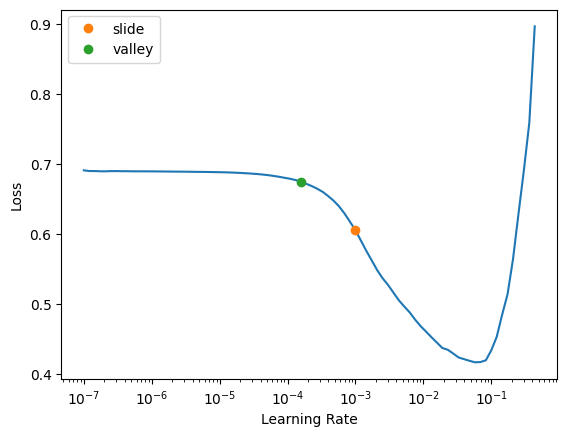

In [14]:
lr_finder = learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
# learning rates from the learner.lr_find() method in fastai. According to the web search results, you can do this by assigning the output of lr_find() to a variable,
# such as lrs, and then accessing the attributes lrs.slide and lrs.valley. For example:

# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
# lr_slide = lrs.slide lr_valley = lrs.valley

In [13]:
def slide_valley_midpoint(slide, valley):
  return (valley + slide)/2

In [ ]:
import random
optimal_val_loss = random.randrange(1000, 2001)  #learner.recorder.values[-1][2]

In [15]:
slide= lr_finder.slide #0.001000
valley= lr_finder.valley #0.0001584
learner.fit_one_cycle(1,lr_max = slide_valley_midpoint(slide,valley))#,
#cbs=SaveModelCallback(fname='quote-classifier-bestonly', monitor='valid_loss'))

val_loss = learner.recorder.values[-1][1]
if val_loss < optimal_val_loss:
    optimal_val_loss = val_loss
    learner.export("models/quote-classifier-stage-0.pkl")

In [17]:
slide, valley, val_loss

(0.001, 0.0001584, 0.07818735390901566)

In [ ]:
slide=0.00301
valley=0.00022
learner.fit_one_cycle(2,lr_max = slide_valley_midpoint(slide,valley))#,
#cbs=SaveModelCallback(fname='quote-classifier-bestonly', monitor='valid_loss'))

val_loss = learner.recorder.values[-1][2]
if val_loss < optimal_val_loss:
  learner.export("models/quote-classifier-stage-0.pkl")

In [ ]:
#learner.save("quote-classifier-stage-0") #.pth

In [29]:
learner.export("models/quote-classifier-0.5freeze-working.pkl")

# Stage - 1

In [ ]:
# learner.load("book-classifier-stage-0")

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.005248074419796467, valley=1.737800812406931e-05)

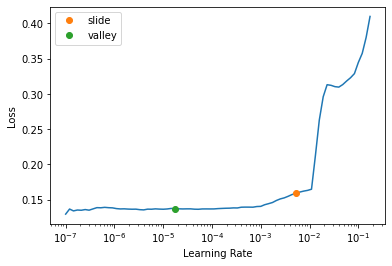

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
slide=0.00301
valley=0.00022
learner.fit_one_cycle( 2, lr_max = slide_valley_midpoint(slide,valley),
cbs=SaveModelCallback(fname='quote-classifier-bestonly', monitor='valid_loss'))

In [27]:
learner.save("quote-classifier-working")

Path('models/quote-classifier-working.pth')

In [ ]:
learner.export("models/book-classifier-stage-1.pkl")

# string test: IRL input inference

In [19]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)
train_ids, valid_ids = splitter(qdf)
len(train_ids), len(valid_ids)

(30848, 7712)

In [21]:
valid_df = qdf.loc[valid_ids]
valid_df.tail(20)

attirbuted author  \
30585        Dejan Stojanovic   
13399            Sylvia Plath   
1918            George Carlin   
21707       Anthony T. Hincks   
23597        Yevgeny Zamyatin   
8275         Stanley Hauerwas   
8746           Vishwanath S J   
37170       Nathaniel Branden   
12871            Sarah Dessen   
37023     Michel de Montaigne   
5206          Teddy Roosevelt   
31691        John Paul Warren   
3709          Richard Branson   
8183   Alexander Gordon Smith   
22186            Paulo Coelho   
30799     Robert Farrar Capon   
19211           Richie Norton   
28446         Cassandra Clare   
26086       August Strindberg   
37431           Julie Farrell   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        quote  \
30585                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           The world is God's salvation.   
13399                                                                                                                                                                                                                                                                                                                                                     Oh, something is there, waiting for me. Perhaps someday the revelation will burst in upon me and I will see the other side of this monumental grotesque joke. And then I'll laugh. And then I'll know what life is.   
1918                                                                                                                                                                                                                                                                                                                                                                                                                                                                      So, have a little fun. Soon enough you'll be dead and burning in Hell with the rest of your family.   
21707                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Life stops when my universe ends.   
23597                                                                                                                                                                                                                                                                                                                                                                               You are afraid of it because it is stronger than you; you hate it because you are afraid of it; you love it because you cannot subdue it to y

In [ ]:
model_path = "models/quote-classifier-0.5freeze-working.pkl" #quote-classifier.pkl"
learner_inf = load_learner(model_path)

In [22]:
test_quote = '''Haven't I? - he thought. Haven't I thought of it since the first time I saw you? Haven't I thought of nothing else for two years?...He sat motionless, looking at her. He heard the words he had never allowed himself to form, the words he had felt, known, yet had not faced, had hoped to destroy by never letting them be said within his own mind. Now it was as sudden and shocking as if he were saying it to her...Since the first time I saw you...Nothing but your body, that mouth of yours, and the way your eyes
''' #[love , passion]

In [23]:
learner.blurr_predict(test_quote)[0]['labels'] #learner_inf

['love']

In [ ]:
learner.blurr_predict(test_quote)#("random placeholder")

[{'labels': [],
  'scores': [],
  'class_indices': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'class_labels': ['humor', 'philosophy', 'science', 'books', 'life', 'work', 'writing', 'religion', 'women', 'death', 'fear', 'reading', 'lies', 'truth', 'people', 'love', 'inspirational', 'Cassandra Clare', 'god', 'funny', 'humanity', 'wisdom', 'success', 'knowledge', 'happiness', 'faith', 'time', 'friendship', 'romance', 'peace